In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, skewnorm

In [34]:
def sigmoid(arr: np.ndarray, pow: float = 1, mult: float = 1, shift: float = 0) -> np.ndarray:
    # apply powered sigmoid to unskew data
    return 1 / (1 + np.exp(-mult * (arr + shift))) ** pow

def anti_sigmoid(arr: np.ndarray, pow: float = 1, mult: float = 1, shift: float = 0) -> np.ndarray:
    # reverse powered sigmoid to reskew data
    return - np.log(np.power(arr, -1 / pow) - 1) / mult - shift

In [38]:
def get_left_skewed(skew_param: float, shape) -> np.ndarray:
    # get left skewed distribution
    return skewnorm.rvs(skew_param, size=shape)

1.0229452642556305
0.3875179099940404


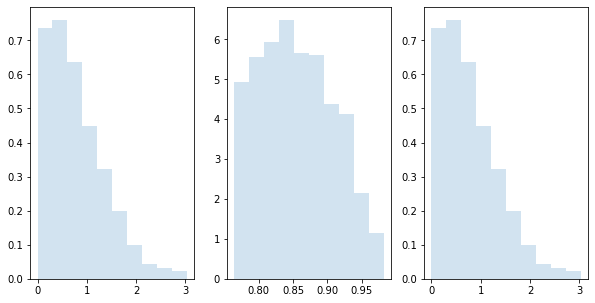

In [154]:
skew_param = 1000
r = get_left_skewed(skew_param, (1000,))
print(skew(r))

pow = sigmoid(skew(r), pow=10, mult=-4, shift=-1.6)
print(pow)
sig = sigmoid(r, pow=pow)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax[1].hist(sig, density=True, histtype='stepfilled', alpha=0.2)
ax[2].hist(anti_sigmoid(sig, pow), density=True, histtype='stepfilled', alpha=0.2)
plt.show()

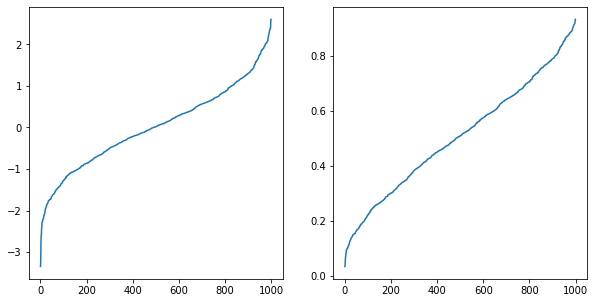

In [153]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.sort(r))
ax[1].plot(np.sort(sigmoid(r, pow)))
plt.show()